In [1]:
# Thompson Sampling for Slot Machines

# Importing the libraries
import numpy as np

# Setting conversion rates and the number of samples
conversionRates = [0.15, 0.04, 0.13, 0.11, 0.05]
N = 10000
d = len(conversionRates)

# Creating the dataset
X = np.zeros((N, d))
for i in range(N):
    for j in range(d):
        if np.random.rand() < conversionRates[j]:
            X[i][j] = 1

# Making arrays to count our losses and wins
nPosReward = np.zeros(d)
nNegReward = np.zeros(d)

# Taking our best slot machine through beta distibution and updating its losses and wins
for i in range(N):
    selected = 0
    maxRandom = 0
    for j in range(d):
        randomBeta = np.random.beta(nPosReward[j] + 1, nNegReward[j] + 1)
        if randomBeta > maxRandom:
            maxRandom = randomBeta
            selected = j
    if X[i][selected] == 1:
        nPosReward[selected] += 1
    else:
        nNegReward[selected] += 1

# Showing which slot machine is considered the best
nSelected = nPosReward + nNegReward 
for i in range(d):
    print('Machine number ' + str(i + 1) + ' was selected ' + str(nSelected[i]) + ' times')
print('Conclusion: Best machine is machine number ' + str(np.argmax(nSelected) + 1))

Machine number 1 was selected 8065.0 times
Machine number 2 was selected 78.0 times
Machine number 3 was selected 1527.0 times
Machine number 4 was selected 254.0 times
Machine number 5 was selected 76.0 times
Conclusion: Best machine is machine number 1


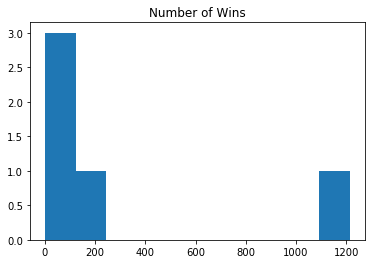

In [2]:
from matplotlib import pyplot as plt

plt.hist(nPosReward)
plt.title('Number of Wins')
plt.show()

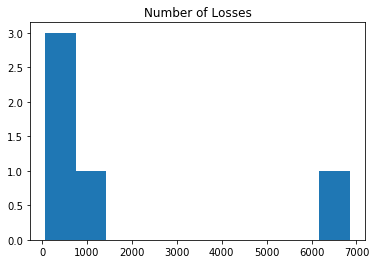

In [3]:
plt.hist(nNegReward)
plt.title('Number of Losses')
plt.show()

In [4]:
# Models comparison
import pandas as pd

N = [200, 1000, 5000]
D = 20
convRanges = [(0., 0.1), (0., 0.3), (0., 0.5)]

results = list()
for n in N:
    for ranges in convRanges:
        results.append([])
        for d  in range(3, D + 1):
            p1 = 0
            p2 = 0

            for rounds in range(1000):
                
                conversionRates = list()
                for i in range(d):
                    conversionRates.append(np.random.uniform(low = ranges[0], high = ranges[1]))
                    
                X = np.zeros((n,d))
                for i in range(n):
                    for j in range(d):
                        if np.random.rand() < conversionRates[j]:
                            X[i][j] = 1
                
                nPosReward = np.zeros(d)
                nNegReward = np.zeros(d)
                
                for i in range(n):
                    selected = 0
                    maxRandom = 0
                    
                    for j in range(d):
                        randomBeta = np.random.beta(nPosReward[j] + 1, nNegReward[j] + 1)
                        if randomBeta > maxRandom:
                            maxRandom = randomBeta
                            selected = j
                        
                    if X[i][selected] == 1:
                        nPosReward[selected] += 1
                    else:
                        nNegReward[selected] += 1
                
                nSelected = nPosReward + nNegReward
                
                left = n - max(nSelected)
                
                countStandard = np.zeros(d)
                
                x = int(left / d)
                for i in range(x):
                    for j in range(d):
                        if X[i][j] == 1:
                            countStandard[j] += 1
                
                bestStandard = np.argmax(countStandard)
                bestReal = np.argmax(conversionRates)
                bestTS = np.argmax(nSelected)

                if bestTS == bestReal:
                    p1 += 1
                if bestStandard == bestReal:
                    p2 += 1
                
            print('N = ' + str(n) + ' d = ' + str(d) + ' range = ' + str(ranges) + ' | result Thompson Sampling = ' + str(p1) + ' result Standard solution = ' + str(p2))
            results.append([n, ranges, d, p1, p2])
                
df = pd.DataFrame(results)
df.to_excel('results.xlsx', sheet_name = 'Result', index = False)

N = 200 d = 3 range = (0.0, 0.1) | result Thompson Sampling = 600 result Standard solution = 577
N = 200 d = 4 range = (0.0, 0.1) | result Thompson Sampling = 555 result Standard solution = 510
N = 200 d = 5 range = (0.0, 0.1) | result Thompson Sampling = 454 result Standard solution = 442
N = 200 d = 6 range = (0.0, 0.1) | result Thompson Sampling = 394 result Standard solution = 398
N = 200 d = 7 range = (0.0, 0.1) | result Thompson Sampling = 360 result Standard solution = 348
N = 200 d = 8 range = (0.0, 0.1) | result Thompson Sampling = 321 result Standard solution = 297
N = 200 d = 9 range = (0.0, 0.1) | result Thompson Sampling = 293 result Standard solution = 278
N = 200 d = 10 range = (0.0, 0.1) | result Thompson Sampling = 277 result Standard solution = 234
N = 200 d = 11 range = (0.0, 0.1) | result Thompson Sampling = 256 result Standard solution = 230
N = 200 d = 12 range = (0.0, 0.1) | result Thompson Sampling = 228 result Standard solution = 200
N = 200 d = 13 range = (0.0

KeyboardInterrupt: 

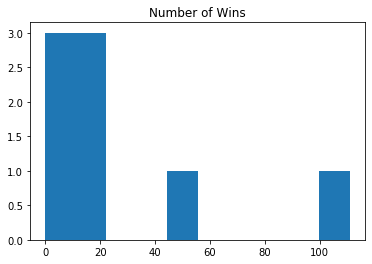

In [5]:
plt.hist(nPosReward)
plt.title('Number of Wins')
plt.show()

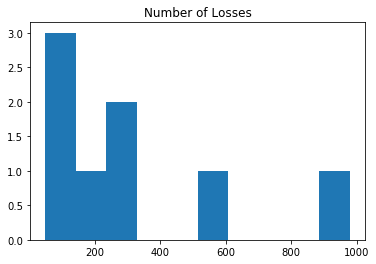

In [6]:
plt.hist(nNegReward)
plt.title('Number of Losses')
plt.show()